# Major League

Data from https://github.com/fivethirtyeight/data/tree/master/soccer-spi, using soccer dataset.

We are using regression models to determine the scores for each team using the other columns as features

In [181]:
import pandas as pd

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

### Load data of matches

In [183]:
df = pd.read_csv("../data/spi_matches.csv")

In [184]:
df.shape

(20887, 22)

In [185]:
# Load ranking data
ranking = pd.read_csv("../data/spi_global_rankings.csv")

In [186]:
ranking = ranking.drop(columns=['prev_rank','league'])
ranking.head()

,rank,name,off,def,spi
0,1,Manchester City,2.92,0.20,93.78
1,2,Barcelona,3.12,0.38,92.41
2,3,Real Madrid,2.99,0.38,91.75
3,4,Bayern Munich,2.94,0.40,90.93
4,5,Juventus,2.66,0.29,90.72


### Check the null data.

In [187]:
df.isnull().sum()

date               0
league_id          0
league             0
team1              0
team2              0
spi1               0
spi2               0
prob1              0
prob2              0
probtie            0
proj_score1        0
proj_score2        0
importance1    10327
importance2    10327
score1          6493
score2          6493
xg1            12200
xg2            12200
nsxg1          12200
nsxg2          12200
adj_score1     12200
adj_score2     12200
dtype: int64

### Drop data.
We dropped the columns that is provide no info, the columns missing too much data.

In [188]:
# The columns missing too much data
df = df.drop(columns=['league_id','importance1', 'importance2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'])

Seasons are important to a team while the date is not so helpful.

In [189]:
df['Season'] = pd.to_datetime(df['date']).apply(lambda t: t.year)
df = df.drop(columns=['date'])

Drop the the rows missing score.

In [190]:
df = df.dropna(subset=["score1","score2"])
df.shape

(14394, 13)

In [191]:
df.head()

,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,Season
0,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,0.0,1.0,2016
1,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,2.0,2.0,2016
2,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,2.0,1.0,2016
3,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,0.0,1.0,2016
4,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,1.30,1.01,1.0,1.0,2016


## Merge the match data with ranking data

Transfer teamname and league name into integer. Instead of encoding with random code, we use current ranking as code.Since the spi index is already existed in the matches data, we don't merge the spi from the ranking dataset.(def and off indexes are also changing each year) 

In [192]:
ranking_new = ranking.drop(columns=['off','def','spi'])
ranking_new.rename(columns={ ranking.columns[0]: "rank1",ranking.columns[1]: "team1" }, inplace=True)
ranking_new.head(1)

,rank1,team1
0,1,Manchester City


In [193]:
df_new = pd.merge(df,ranking_new,on=["team1"])

In [194]:
ranking_new.rename(columns={ ranking_new.columns[0]: "rank2",ranking_new.columns[1]: "team2" }, inplace=True)
ranking_new.head(1)

,rank2,team2
0,1,Manchester City


In [195]:
df_new = pd.merge(df_new,ranking_new,on=["team2"])

In [196]:
df_new.head()

,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,Season,rank1,rank2
0,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,2.0,2.0,2016,82,144
1,French Ligue 1,AS Monaco,Guingamp,77.29,57.31,0.6807,0.1249,0.1944,2.22,0.83,6.0,0.0,2017,82,144
2,French Ligue 1,Bordeaux,Guingamp,59.49,58.21,0.4603,0.2420,0.2977,1.48,1.02,3.0,0.0,2017,123,144
3,French Ligue 1,Bordeaux,Guingamp,67.44,58.08,0.5544,0.1869,0.2587,1.63,0.83,3.0,1.0,2017,123,144
4,French Ligue 1,Metz,Guingamp,46.98,61.14,0.3272,0.3764,0.2964,1.25,1.49,2.0,2.0,2016,256,144


In [197]:
df_new.shape

(12587, 15)

Create mapping list

In [198]:
ranking_dict = ranking_new.set_index('team2').to_dict('dict')['rank2']

In [199]:
inv_ranking_dict = {v:k for k,v in ranking_dict.items()}

In [200]:
inv_ranking_dict

{1: 'Manchester City',
 2: 'Barcelona',
 3: 'Real Madrid',
 4: 'Bayern Munich',
 5: 'Juventus',
 6: 'Paris Saint-Germain',
 7: 'Liverpool',
 8: 'Atletico Madrid',
 9: 'Chelsea',
 10: 'Tottenham Hotspur',
 11: 'Napoli',
 12: 'Ajax',
 13: 'Arsenal',
 14: 'Sevilla FC',
 15: 'Valencia',
 16: 'Internazionale',
 17: 'Borussia Dortmund',
 18: 'Manchester United',
 19: 'PSV',
 20: 'AS Roma',
 21: 'FC Porto',
 22: 'AC Milan',
 23: 'FC Salzburg',
 24: 'Real Betis',
 25: 'Espanyol',
 26: 'Getafe',
 27: 'Real Sociedad',
 28: 'Lazio',
 29: 'RB Leipzig',
 30: 'Young Boys',
 31: 'Benfica',
 32: 'PAOK Salonika',
 33: 'Eibar',
 34: 'Lyon',
 35: 'Shakhtar Donetsk',
 36: 'Villarreal',
 37: 'Atalanta',
 38: 'Dynamo Kiev',
 39: 'Fiorentina',
 40: 'Bayer Leverkusen',
 41: 'Club Brugge',
 42: 'CSKA Moscow',
 43: 'Athletic Bilbao',
 44: 'Leganes',
 45: 'TSG Hoffenheim',
 46: 'Celta Vigo',
 47: 'Schalke 04',
 48: 'FC Krasnodar',
 49: 'Leicester City',
 50: 'Alavés',
 51: 'Marseille',
 52: 'Zenit St Petersburg'

### Encoding from string to number

In [201]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le = le.fit(df_new['league'])
df_new['league'] = le.transform(df_new['league'])

In [205]:
df = df_new.drop(columns=['team1','team2'])

In [206]:
df_new.head()

,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,Season,rank1,rank2
0,11,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,2.0,2.0,2016,82,144
1,11,AS Monaco,Guingamp,77.29,57.31,0.6807,0.1249,0.1944,2.22,0.83,6.0,0.0,2017,82,144
2,11,Bordeaux,Guingamp,59.49,58.21,0.4603,0.2420,0.2977,1.48,1.02,3.0,0.0,2017,123,144
3,11,Bordeaux,Guingamp,67.44,58.08,0.5544,0.1869,0.2587,1.63,0.83,3.0,1.0,2017,123,144
4,11,Metz,Guingamp,46.98,61.14,0.3272,0.3764,0.2964,1.25,1.49,2.0,2.0,2016,256,144


### Correlation of dataset
The following figure show the correlation of the features. The lighter the more related.

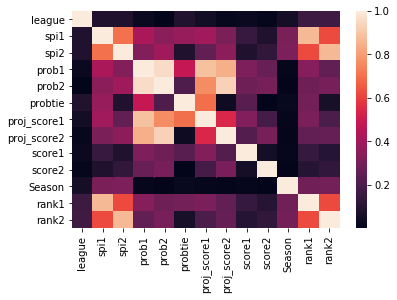

In [207]:
fig = plt.figure() 
ax=fig.add_subplot(figsize=(20,20))
ax=sns.heatmap(abs(df.corr()))
plt.show()  